# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Ikram Syafwan
- **Email:** muhammad.ikram2599@student.unri.ac.id
- **ID Dicoding:** iksyaf

## Defining Business Questions

- How do weather affects the total number of users?
- Which season is the favorite among the users that use bike sharing?

## Import Packages/Library

The first thing we need to do to start this project is to import the packages/libraries that is essential for the project.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

The next step is to gather the data that we need to use, in this case is the **Bike Sharing Dataset** which contains day.csv & hour.csv.

In [5]:
day_data = pd.read_csv("dataset/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_data = pd.read_csv("dataset/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In this step, we will be assessing data that has been gathered. The things we will check consist of: **Data Types, Missing Values, Duplicates, and Inaccurate Values**

#### Assessing Table day_data

In [7]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


The **dteday** is using the wrong data type. We can change the data type to datetime.

In [8]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no **null/missing** values in this table.

In [9]:
print("Total Duplicates: ", day_data.duplicated().sum())

Total Duplicates:  0


There is no **duplicates** in this table.

In [10]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


There is no **Inaccurate Values** in this table.

#### Assessing Table hour_data

In [11]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


The **dteday** is using the wrong data type. We can change the data type to datetime.

In [12]:
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no **null/missing** values in this table.

In [13]:
print("Total Duplicates: ", hour_data.duplicated().sum())

Total Duplicates:  0


There is no **duplicates** in this table.

In [14]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


There is no **Inaccurate Values** in this table.

### Cleaning Data

#### Deleting hour_data Table

Firstly we will remove the **hour_data** table because we just need the **day_data** table for our business questions.

In [15]:
del hour_data

#### Dropping Some Columns

We will be dropping some columns because it doesn't concern our business questions.

In [16]:
drop_column = ['instant', 'temp', 'atemp', 'hum', 'windspeed']

for column in day_data.columns:
    if column in drop_column:
        day_data.drop(labels=column, axis=1, inplace=True)

Checking if the day_data table is updated.

In [17]:
day_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


#### Changing Data Type

Changing the **dteday** data type to datetime from object.

In [18]:
day_data['dteday'] = pd.to_datetime(day_data.dteday)

Checking if the dteday column is updated.

In [19]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   casual      731 non-null    int64         
 9   registered  731 non-null    int64         
 10  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 62.9 KB


#### Changing Column Title

Changing some of the **column title** to make it more readable.

In [20]:
day_data.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'total'}, inplace=True)

Checking if the day_data table is updated.

In [21]:
day_data.head()

,date,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore day_data Table

In [22]:
day_data.describe(include='all')

,date,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,686.622488,1560.256377,1937.211452


Grouping total users by the weather condition.

In [23]:
day_data.groupby(by='weather').agg({
    'total': ['max', 'min', 'sum']
})

total              
          max  min      sum
weather                    
1        8714  431  2257952
2        8362  605   996858
3        4639   22    37869

- 1: Clear, Few clouds, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

As you can see, users tend to bike sharing in the weather 1 which is Clear, Few clouds, Partly cloudy, Partly cloudy

Grouping total users by the season.

In [24]:
day_data.groupby(by='season').agg({
    'total': ['max', 'min', 'sum']
})

total               
         max   min      sum
season                     
1       7836   431   471348
2       8362   795   918589
3       8714  1115  1061129
4       8555    22   841613

- 1: Spring
- 2: Summer
- 3: Fall
- 4: Winter

The users favorite season to bike sharing is Fall and the least favorite is Spring.

## Visualization & Explanatory Analysis

### Question 1: How do weather affects the total number of users?

C:\Users\Ikram\AppData\Local\Temp\ipykernel_15096\1763574939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


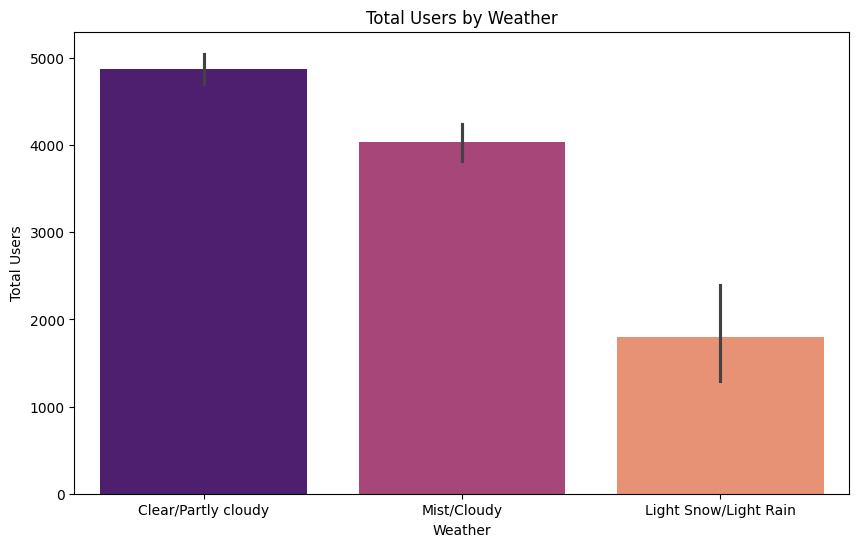

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='weather',
    y='total',
    palette='magma',
    data=day_data)

custom_labels = ['Clear/Partly cloudy', 'Mist/Cloudy', 'Light Snow/Light Rain']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)
plt.xlabel('Weather')
plt.ylabel('Total Users')
plt.title('Total Users by Weather')

plt.show()

Based on the visualization of the data above, weather has an influence on the use of bike sharing where when the weather is clear many users use bike sharing and when the weather is a little rainy or snowy the fewest users use bike sharing.

### Question 2: Which season is the favorite among the users that use bike sharing?

C:\Users\Ikram\AppData\Local\Temp\ipykernel_15096\3140019640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


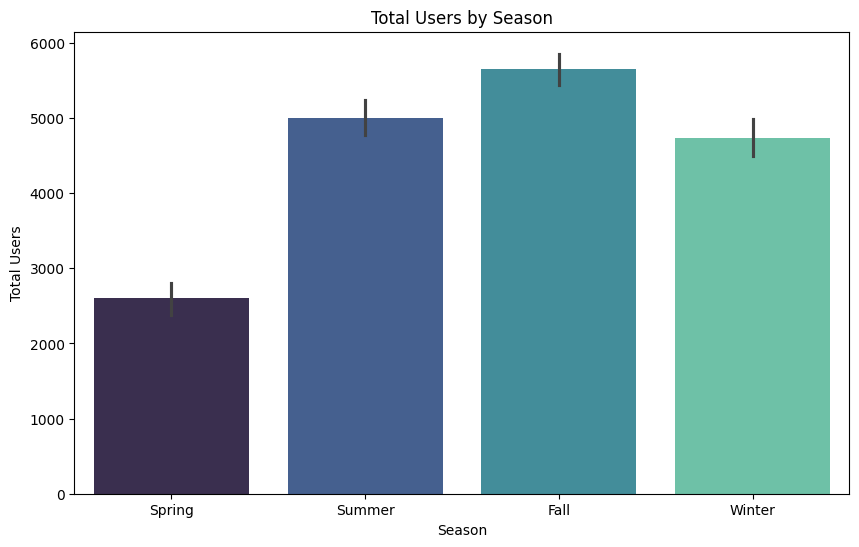

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='season',
    y='total',
    palette='mako',
    data=day_data)

custom_labels = ['Spring', 'Summer', 'Fall', 'Winter']
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)
plt.xlabel('Season')
plt.ylabel('Total Users')
plt.title('Total Users by Season')

plt.show()

Based on the visualization of the data above, season has an influence on the use of bike sharing where in autumn there are the most bike sharing users, while spring is the season when there are the fewest bike sharing users.

## Conclusion

- Question 1 Conclusion: It is proven that weather plays a significant role in influencing bike sharing usage. Clear weather, such as sunny or mild cloudy conditions, have the highest number of users, as it offers a comfortable and safe environment for biking. While, poor weather conditions, such as rain or snow, lead to a significant decrease in bike sharing usage. This suggests that the weather conditions discourage users due to potential discomfort or safety concerns.

- Question 2 Conclusion: Seasons also have a impact on bike sharing usage. Autumn has the highest number of bike sharing users, likely due to favorable weather conditions during this season, such as cooler temperatures and fewer weather events. On the other hand, spring has the lowest number of users, possibly because of unpredictable weather, including rain or temperature fluctuations, making it less favorable for cycling. This seasonal pattern suggests that users prefer bike sharing during stable, comfortable seasonal conditions.